In [ ]:
import cv2
import numpy as np
from scipy.ndimage import rotate
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [2]:
def extract(fname):
    image = cv2.imread(fname)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # key is to find a binary template before findContours!
    # one option is hsv sat (0, 70)
    sat = hsv[:, :, 1]
    sat = cv2.medianBlur(sat, ksize = 3)
    sat1 = cv2.inRange(sat, (0), (60))/255

    rmask = cv2.inRange(image[:, :, 0], (100), (255))/255
    return sat1, rmask

In [ ]:
# using the findcoutours in opencv: 
path = "../data/CC Lake extracted/5/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

for f in onlyfiles[:5]:
# for i in ['DSC00840.jpg', 'DSC00841.jpg', 'DSC00842.jpg', 'DSC00843.jpg']:
    path = "../data/CC Lake extracted/5/"
    sat1, rmask = extract(join(path, f))
    image = cv2.imread(join(path, f))

    comb = np.uint8(np.maximum(sat1, 1-rmask)*255)
    contours, hierarchy  = cv2.findContours(comb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    img1 = cv2.drawContours(np.copy(image), contours, -1, (0,255,75), 3)
    
    fig, (ax1, ax4) = plt.subplots(2, 1, sharex=True)
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax4.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    outpath = "../data/contour/findcontour/"
#     cv2.imwrite(join(outpath, f), img1)

[[[164, 30]], [[163, 31]], [[162, 31]], [[161, 31]], [[160, 31]], [[159, 31]], [[158, 31]], [[157, 31]], [[156, 31]], [[155, 31]], [[154, 31]], [[153, 31]], [[152, 32]], [[151, 32]], [[150, 32]], [[149, 32]], [[148, 32]], [[147, 32]], [[146, 33]], [[145, 33]], [[144, 33]], [[143, 33]], [[142, 33]], [[141, 34]], [[140, 34]], [[139, 34]], [[138, 34]], [[137, 34]], [[136, 34]], [[135, 35]], [[134, 35]], [[133, 35]], [[132, 35]], [[131, 36]], [[130, 36]], [[129, 36]], [[128, 36]], [[127, 36]], [[126, 37]], [[125, 37]], [[124, 37]], [[123, 38]], [[122, 38]], [[121, 38]], [[120, 38]], [[119, 39]], [[118, 39]], [[117, 39]], [[116, 39]], [[115, 39]], [[114, 40]], [[113, 40]], [[112, 40]], [[111, 40]], [[110, 41]], [[109, 41]], [[108, 42]], [[107, 41]], [[106, 42]], [[105, 42]], [[104, 42]], [[103, 42]], [[102, 43]], [[101, 43]], [[100, 43]], [[99, 43]], [[98, 43]], [[97, 43]], [[96, 43]], [[95, 43]], [[94, 44]], [[93, 44]], [[92, 44]], [[91, 44]], [[90, 44]], [[89, 45]], [[88, 45]], [[87, 45]]

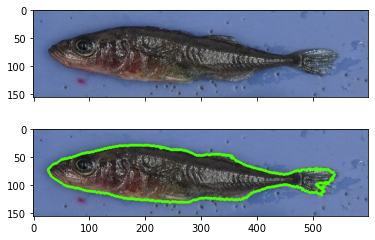

In [24]:
#get the contour result
path = "../data/CC Lake extracted/5/"
fname = 'DSC00840.jpg'

sat1, rmask = extract(join(path, f))
image = cv2.imread(join(path, f))
comb = np.uint8(np.maximum(sat1, 1-rmask)*255)
contours, hierarchy = cv2.findContours(comb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# show first 100 points as an exmaple
print(contours[-3][:100, :,:].tolist())

img1 = cv2.drawContours(np.copy(image), contours[-3], -1, (0,255,75), 3)
fig, (ax1, ax4) = plt.subplots(2, 1, sharex=True)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax4.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [ ]:
# try other contour method: 